### Projet Machine Learning : Notebook R

In [1]:
library(dplyr)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




### I. Analyse exploratoire des données

In [2]:
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
df <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", dec="." ,header = TRUE)
# Premières lignes du jeu de données
head(df)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


1. Commencez par vérifier la nature des différentes variables et leur encodage. Convertissez la variable
Year en une variable qualitative. N.B. Curieusement, la variable Density (P/Km2) n’est pas con-
sidérée comme une variable numérique. Convertissez-là en une variable numérique en prenant soin de
ne pas transformer les nombre décimaux en NA. Par exemple, en R, vous pourrez utiliser la formule:
as.numeric(gsub(",","",data$Density.n.P.Km2.)), où data représente le jeu de données utilisé.

In [3]:
summary(df)

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [4]:
print("---Variable Year---")

df[,"Year"] <- as.factor(df[,"Year"])
summary(df["Year"])

print("---Variable Entity---")

df[,"Entity"] <- as.factor(df[,"Entity"])
summary(df["Entity"])

print("---Variable Density.P.Km2.---")

df[,"Density.P.Km2."] <- as.numeric(gsub(",",".",(df[,"Density.P.Km2."])))
summary(df["Density.P.Km2."])

[1] "---Variable Year---"


      Year     
 2013   : 175  
 2014   : 175  
 2015   : 175  
 2016   : 175  
 2017   : 175  
 2018   : 175  
 (Other):2599  

[1] "---Variable Entity---"


                 Entity    
 Afghanistan        :  21  
 Albania            :  21  
 Algeria            :  21  
 Angola             :  21  
 Antigua and Barbuda:  21  
 Argentina          :  21  
 (Other)            :3523  

[1] "---Variable Density.P.Km2.---"


 Density.P.Km2.    
 Min.   :   1.265  
 1st Qu.:  26.000  
 Median :  81.000  
 Mean   : 137.058  
 3rd Qu.: 203.000  
 Max.   :1281.000  
 NA's   :1         

2. Déterminez le taux de valeurs manquantes pour chaque variable.
On propose de supprimer pour ce projet les variables comportant un taux de données manquantes très im-
portant: Renewable-electricity-generating-capacity-per-capita, Financial flows to developing
countries (US Dollars) et Renewables (% equivalent primary energy).

In [5]:
for (i in names(df))
  print(paste(sum(is.na(df[i])/nrow(df)*100) ,":", i))

[1] "0 : Entity"
[1] "0 : Year"
[1] "0.274047684297068 : Access.to.electricity....of.population."
[1] "4.63140586462044 : Access.to.clean.fuels.for.cooking"
[1] "25.513839408057 : Renewable.electricity.generating.capacity.per.capita"
[1] "57.2485612496574 : Financial.flows.to.developing.countries..US..."
[1] "5.31652507536311 : Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] "0.575500137023842 : Electricity.from.fossil.fuels..TWh."
[1] "3.45300082214305 : Electricity.from.nuclear..TWh."
[1] "0.575500137023842 : Electricity.from.renewables..TWh."
[1] "1.15100027404768 : Low.carbon.electricity....electricity."
[1] "0 : Primary.energy.consumption.per.capita..kWh.person."
[1] "5.6727870649493 : Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] "11.7292408879145 : Value_co2_emissions_kt_by_country"
[1] "58.5639901342834 : Renewables....equivalent.primary.energy."
[1] "8.68731159221705 : gdp_growth"
[1] "7.72814469717731 : gdp_per_capita"
[1] "0.027404768

In [6]:
df <- subset(df, select = -c(Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.))

On enlève donc les colonnes inutiles, car présentant trop de données manquantes. (Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.)

In [7]:
summary(df)

                 Entity          Year     
 Afghanistan        :  21   2013   : 175  
 Albania            :  21   2014   : 175  
 Algeria            :  21   2015   : 175  
 Angola             :  21   2016   : 175  
 Antigua and Barbuda:  21   2017   : 175  
 Argentina          :  21   2018   : 175  
 (Other)            :3523   (Other):2599  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :  1.252                         Min.   :  0.00                   
 1st Qu.: 59.801                         1st Qu.: 23.18                   
 Median : 98.362                         Median : 83.15                   
 Mean   : 78.934                         Mean   : 63.26                   
 3rd Qu.:100.000                         3rd Qu.:100.00                   
 Max.   :100.000                         Max.   :100.00                   
 NA's   :10                              NA's   :169                      
 Renewable.energy.share.in.the.total.final.energy.consum

3. Pour la suite de l’étude, vous allez créer un jeu de données comportant seulement les individus qui n’ont
pas de valeur manquante. Il reste alors 2868 observations

In [8]:
df <- na.omit(df)

In [9]:
print(paste("Le jeu de données contient désormais",nrow(df),"lignes, après avoir supprimé les lignes comportant des valeurs manquantes"))

[1] "Le jeu de données contient désormais 2868 lignes, après avoir supprimé les lignes comportant des valeurs manquantes"


4. Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?


Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine




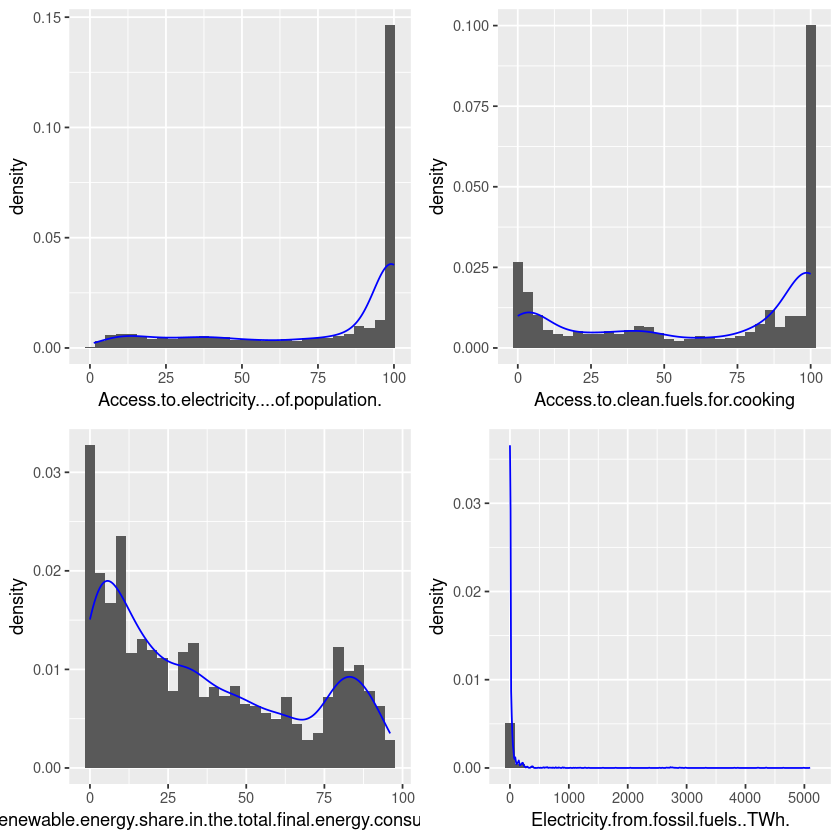

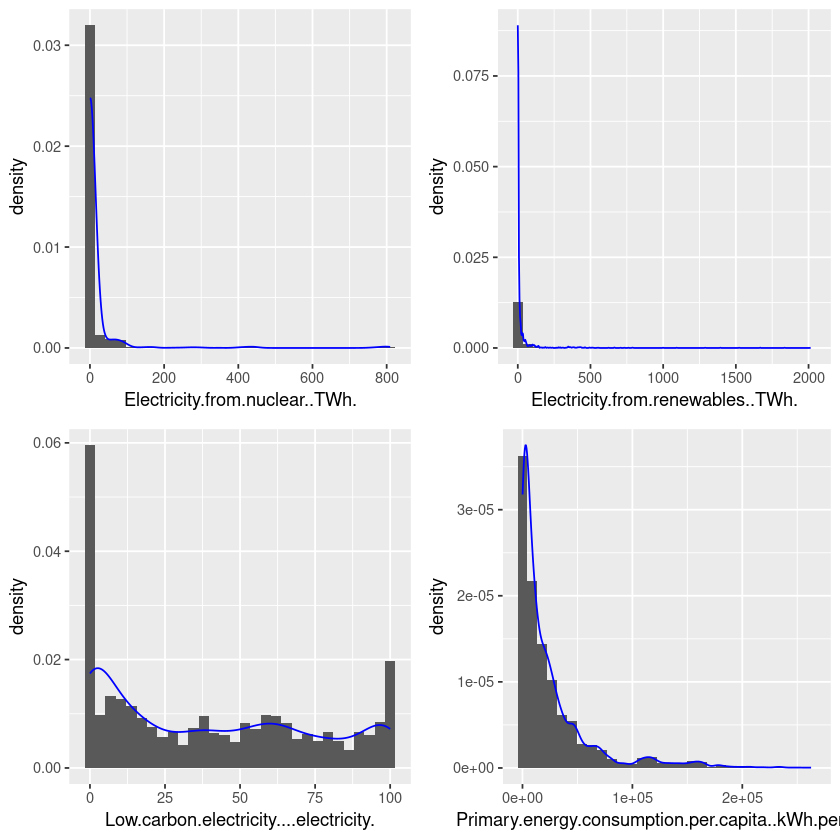

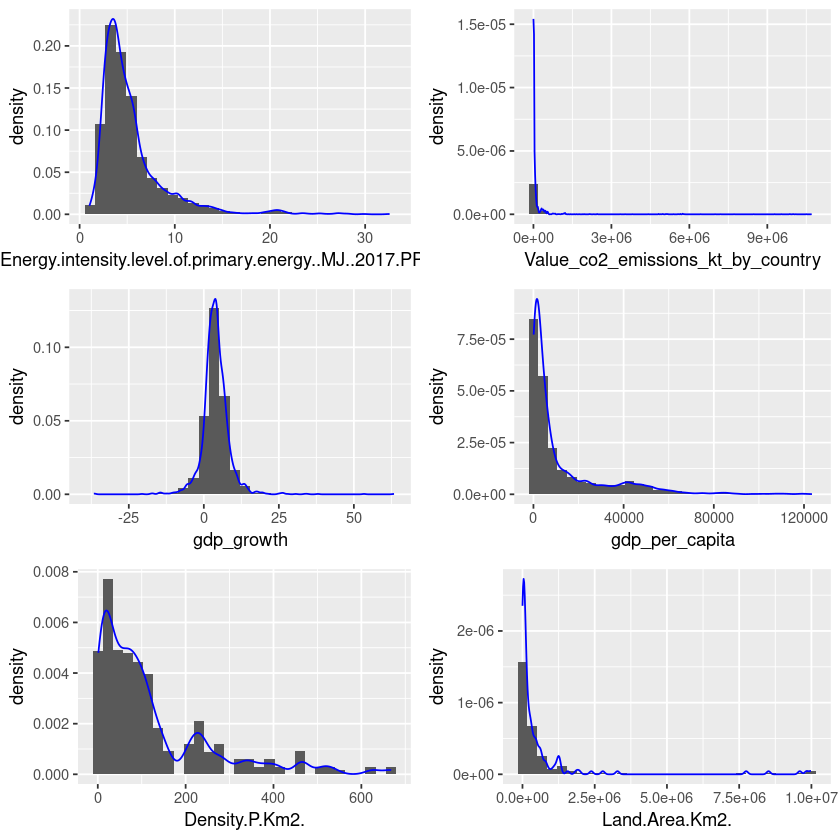

In [10]:
library(ggplot2)
library(gridExtra)

bins = 30

g1<-ggplot(df,aes(x=Access.to.electricity....of.population.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g2<-ggplot(df,aes(x=Access.to.clean.fuels.for.cooking))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g3<-ggplot(df,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g4<-ggplot(df,aes(x=Electricity.from.fossil.fuels..TWh.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g5<-ggplot(df,aes(x=Electricity.from.nuclear..TWh.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g6<-ggplot(df,aes(x=Electricity.from.renewables..TWh.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g7<-ggplot(df,aes(x=Low.carbon.electricity....electricity.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g8<-ggplot(df,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g9<-ggplot(df,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g10<-ggplot(df,aes(x=Value_co2_emissions_kt_by_country))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g11<-ggplot(df,aes(x=gdp_growth))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g12<-ggplot(df,aes(x=gdp_per_capita))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g13<-ggplot(df,aes(x=Density.P.Km2.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g14<-ggplot(df,aes(x=Land.Area.Km2.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

grid.arrange(g1,g2, g3,g4,ncol=2)
grid.arrange(g5,g6,g7,g8,ncol=2)
grid.arrange(g9, g10, g11, g12, g13, g14, ncol=2)

rm(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14)

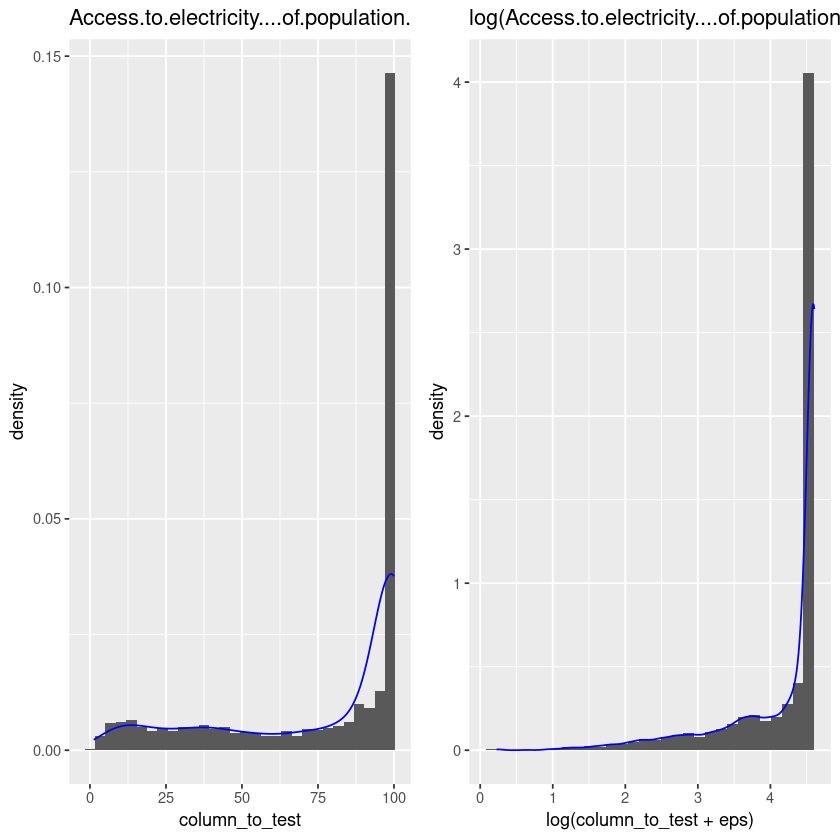

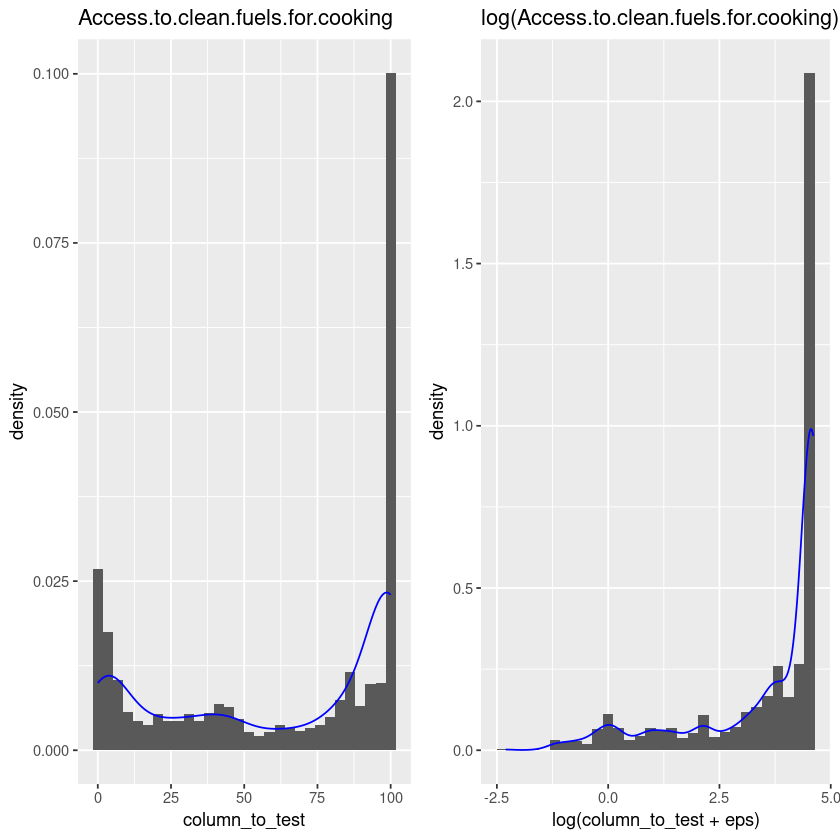

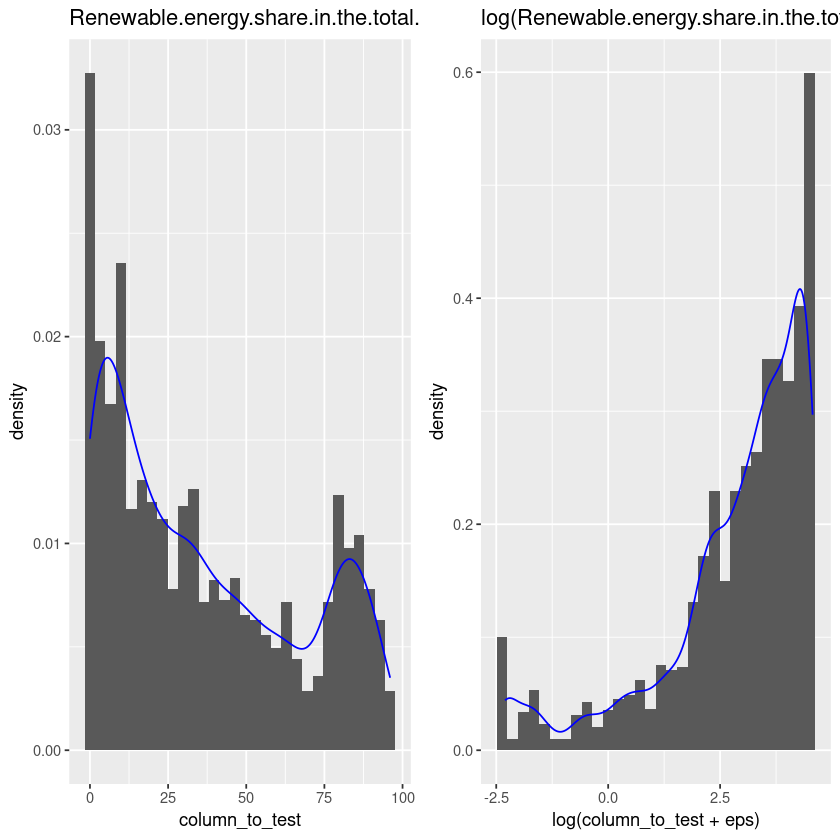

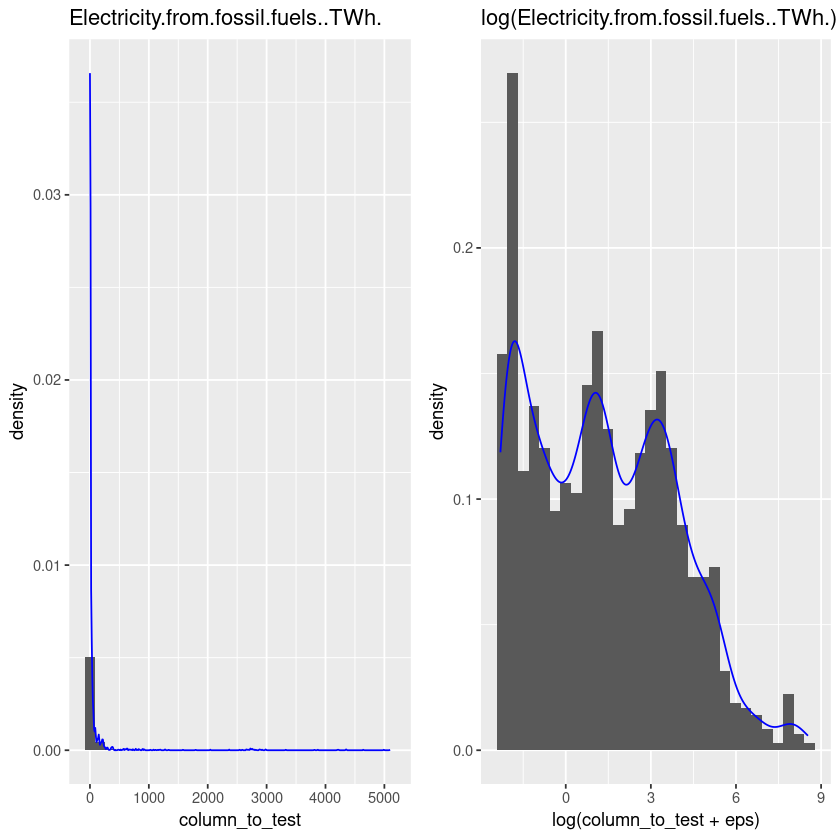

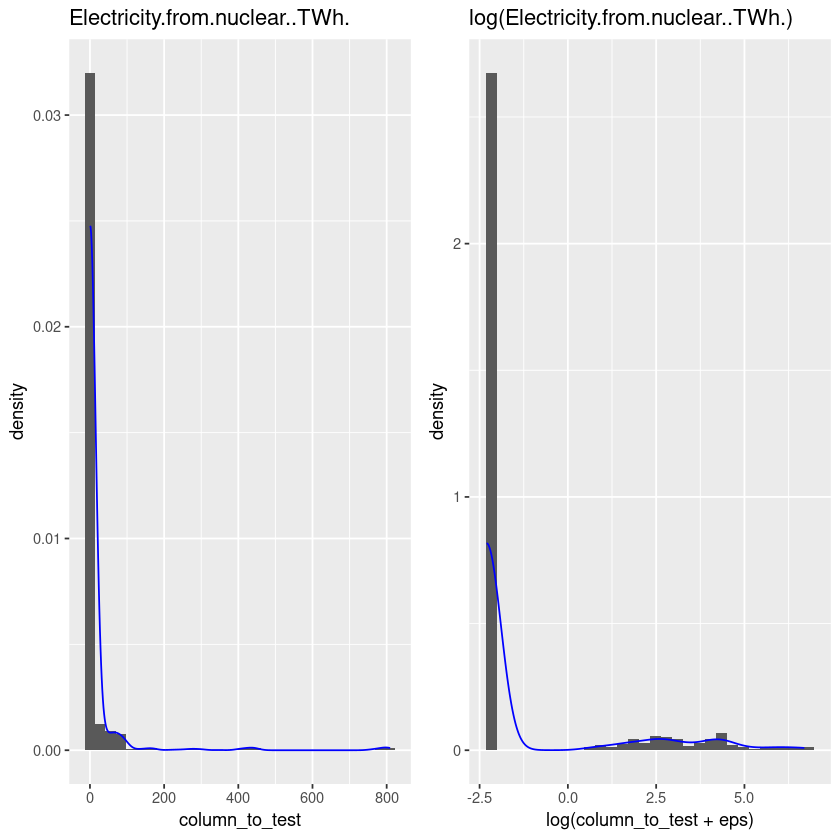

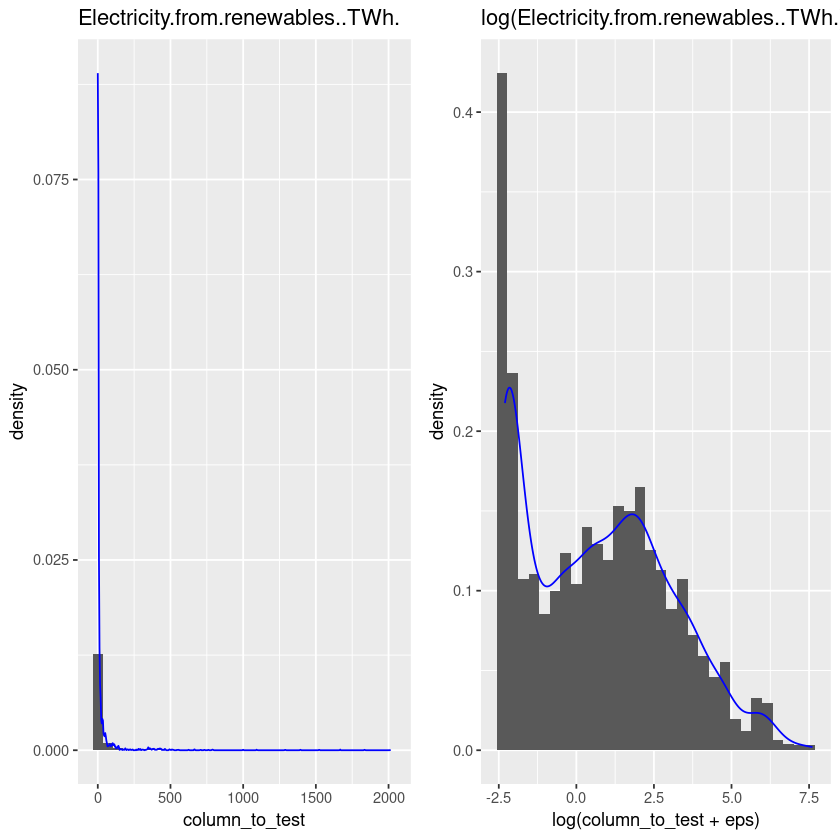

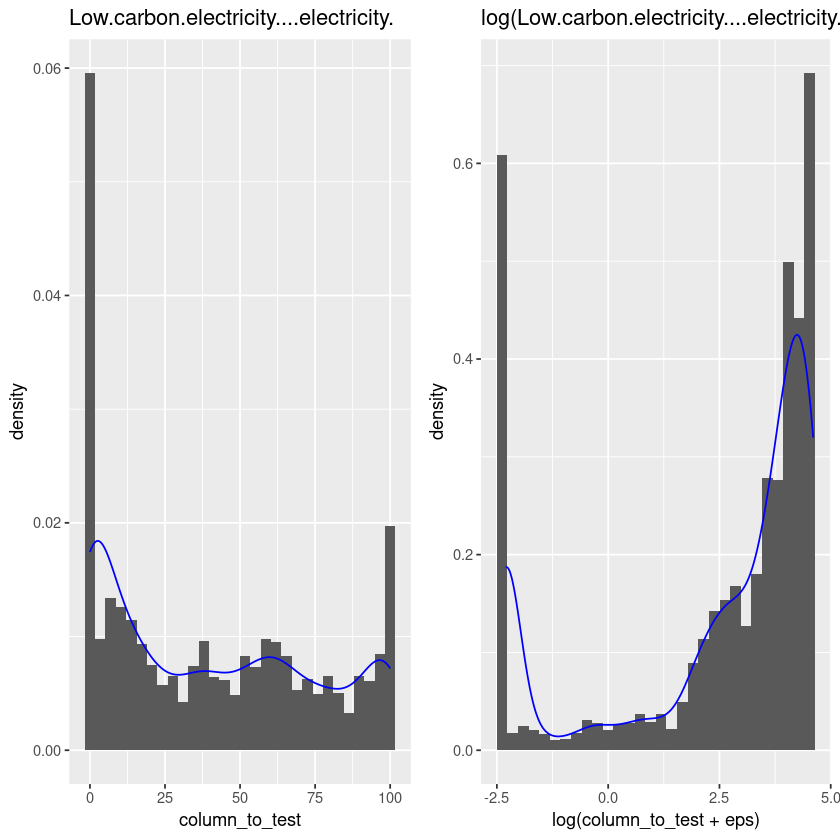

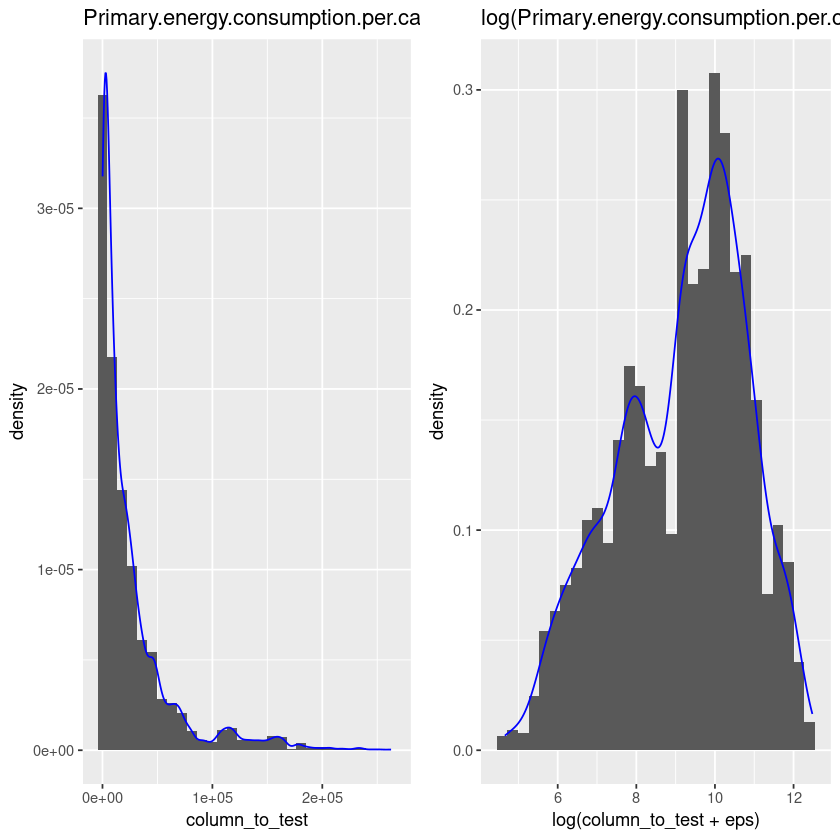

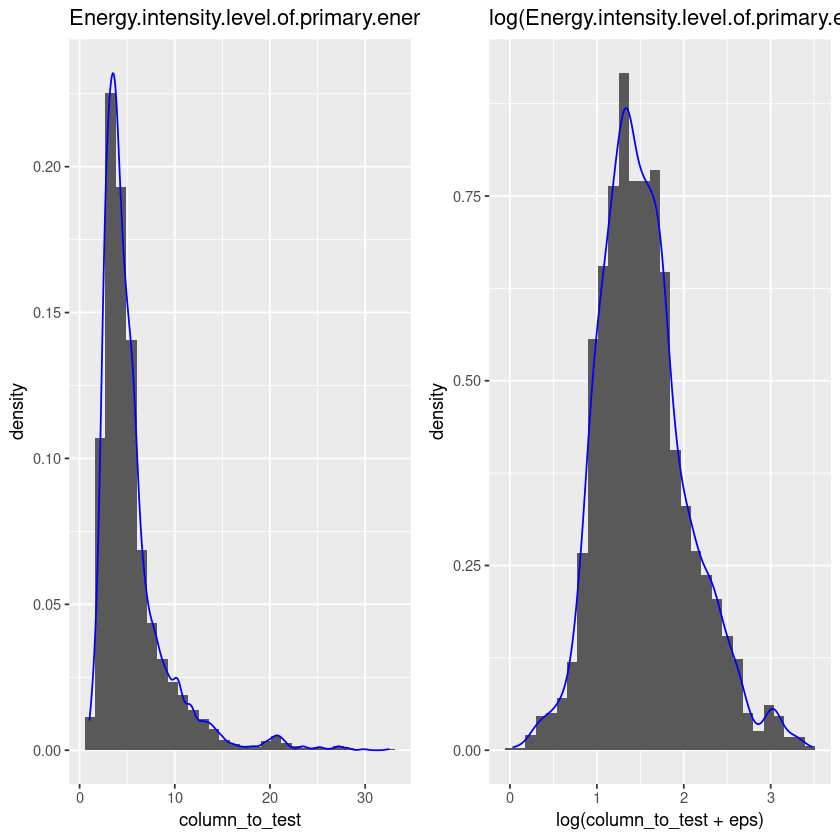

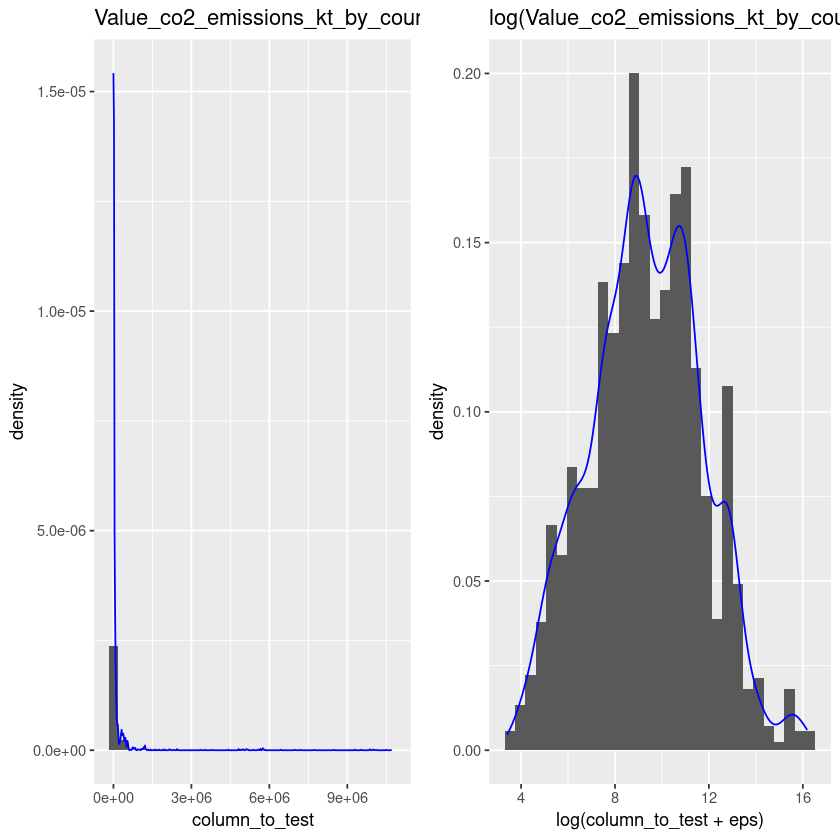

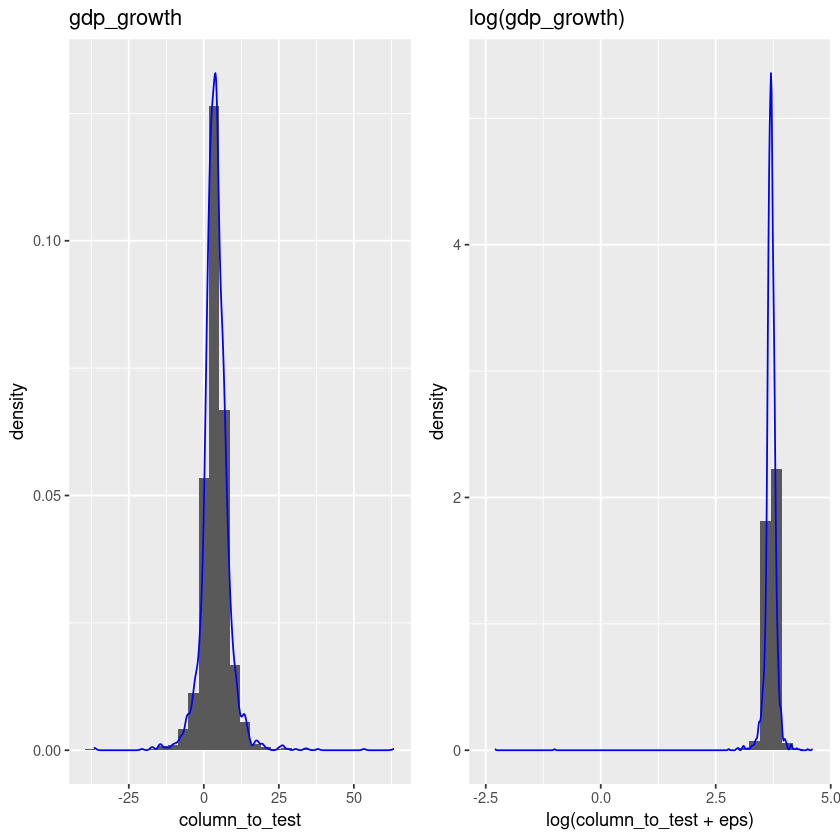

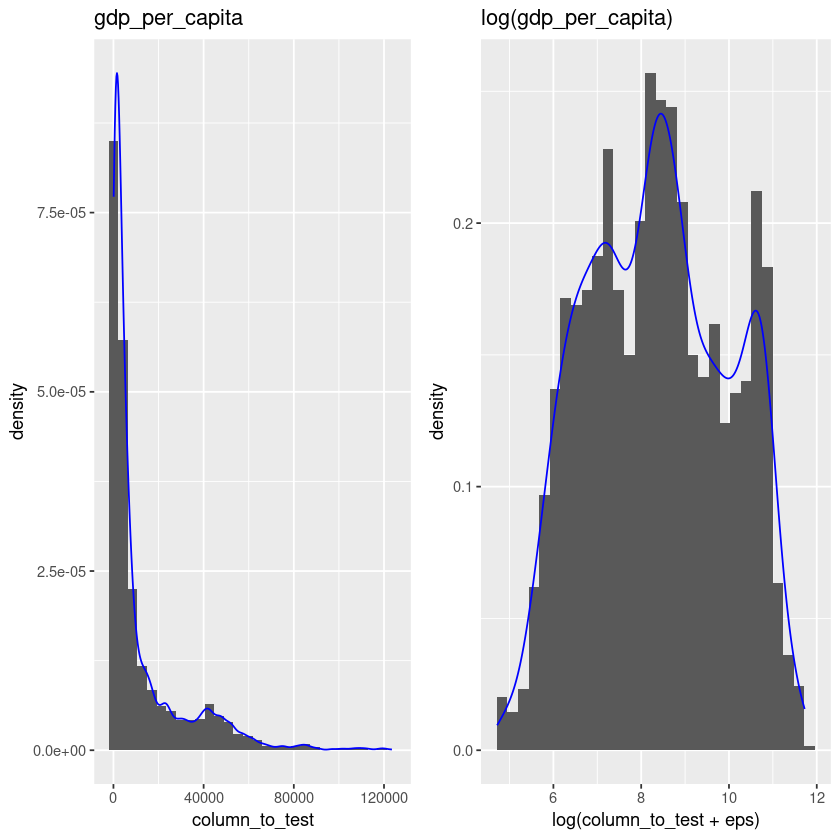

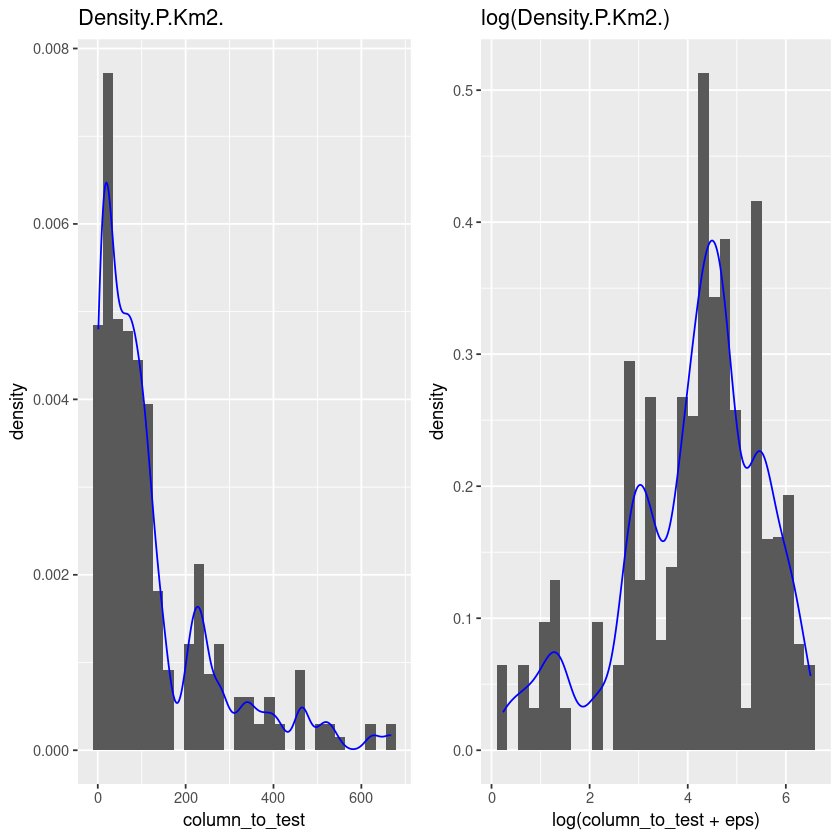

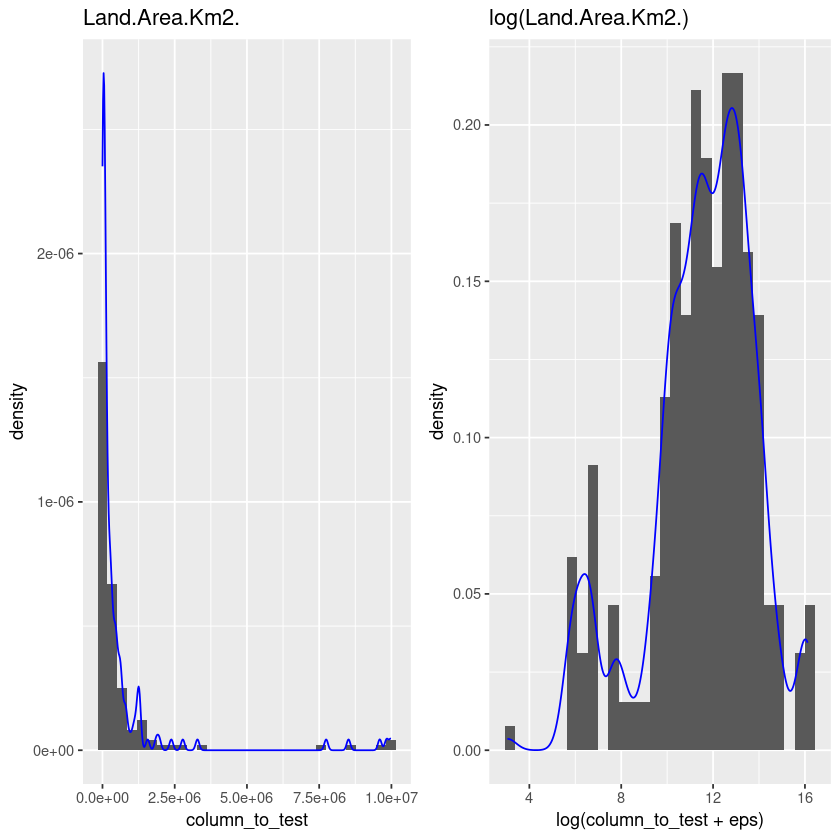

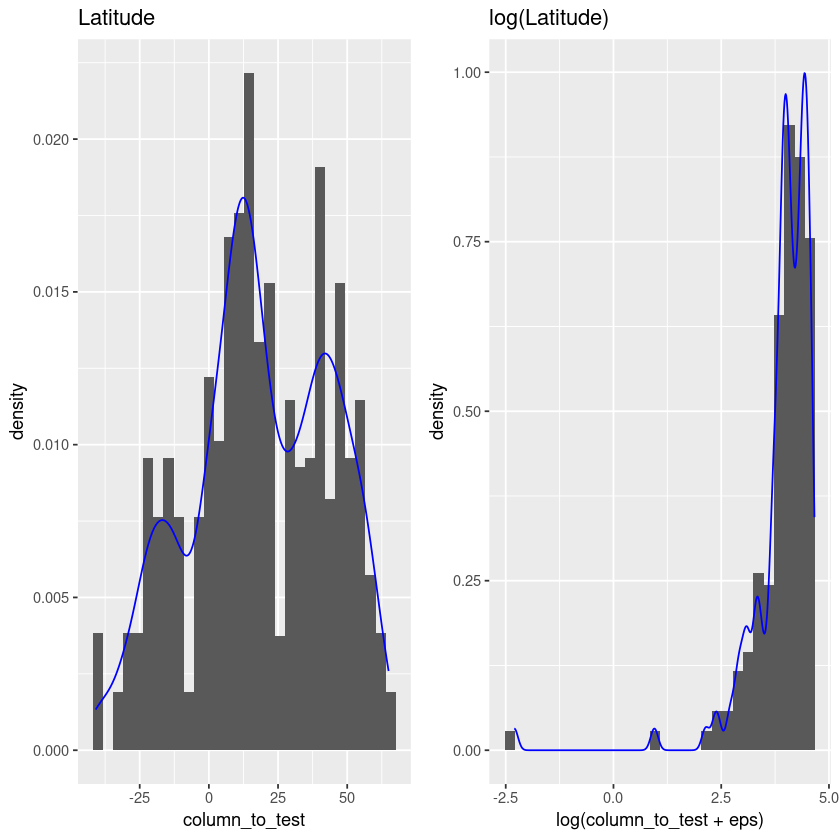

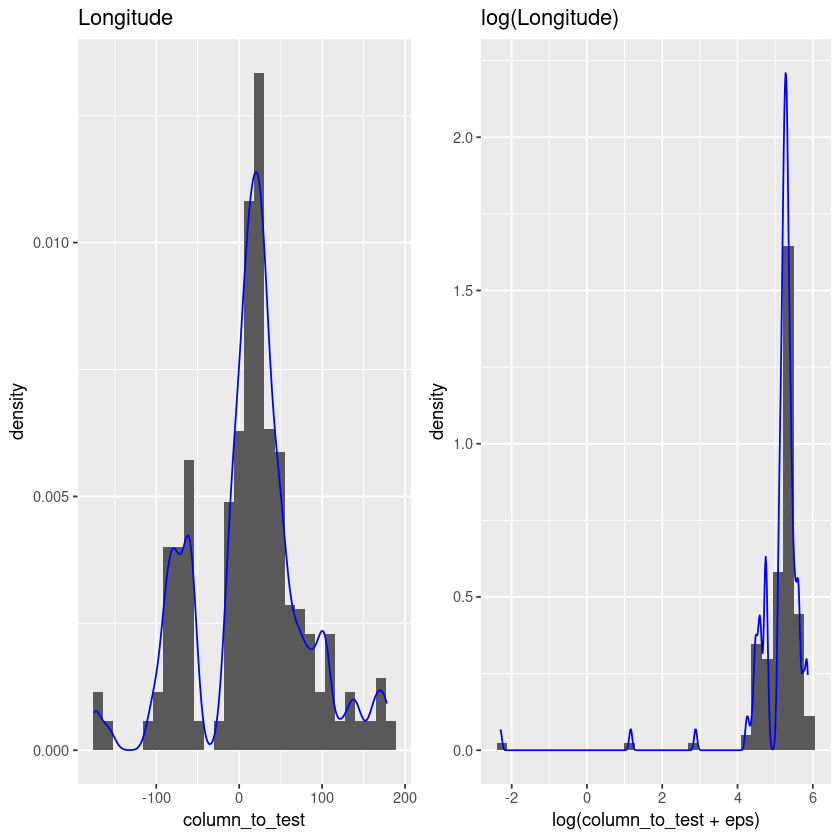

In [11]:
interesting_columns <- select(df, -c(Entity, Year))

for (i in 1:ncol(interesting_columns)){
    
  column_to_test = interesting_columns[,i]
  colname = colnames(interesting_columns)[i]
  
  eps = 0
  if (min(column_to_test)<=0){
    eps = abs(min(column_to_test)) + 0.1
  }
  
  g1<-ggplot(interesting_columns,aes(x=column_to_test))+
  geom_histogram(aes(y=after_stat(density)), bins = bins)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(colname)
  
  g2<-ggplot(interesting_columns,aes(x=log(column_to_test + eps)))+
  geom_histogram(aes(y=after_stat(density)), bins = bins)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(paste("log(",colname,")", sep=""))
  
  grid.arrange(g1, g2, ncol = 2)
  
}

In [12]:
df <- df %>% mutate(log_Primary.energy.consumption.per.capita..kWh.person. = log(Primary.energy.consumption.per.capita..kWh.person.),
                    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.),
                    log_gdp_per_capita = log(gdp_per_capita),
                    log_Value_co2_emissions_kt_by_country = log(Value_co2_emissions_kt_by_country),
                    log_Density.P.Km2. = log(Density.P.Km2.),
                    log_Land.Area.Km2. = Land.Area.Km2.)

head(df)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,⋯,Density.P.Km2.,Land.Area.Km2.,Latitude,Longitude,log_Primary.energy.consumption.per.capita..kWh.person.,log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,log_gdp_per_capita,log_Value_co2_emissions_kt_by_country,log_Density.P.Km2.,log_Land.Area.Km2.
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4,Afghanistan,2003,14.73851,9.50,36.66,0.31,0,0.63,67.02128,229.9682,⋯,60,652230,33.93911,67.70995,5.437941,0.3364722,5.250617,7.106606,4.094345,652230
5,Afghanistan,2004,20.06497,10.90,44.24,0.33,0,0.56,62.92135,204.2312,⋯,60,652230,33.93911,67.70995,5.319253,0.1823216,5.353667,6.937314,4.094345,652230
6,Afghanistan,2005,25.39089,12.20,33.88,0.34,0,0.59,63.44086,252.0691,⋯,60,652230,33.93911,67.70995,5.529703,0.3435897,5.489067,7.346010,4.094345,652230
7,Afghanistan,2006,30.71869,13.85,31.89,0.20,0,0.64,76.19048,304.4209,⋯,60,652230,33.93911,67.70995,5.718411,0.4054651,5.574940,7.473069,4.094345,652230
8,Afghanistan,2007,36.05101,15.30,28.78,0.20,0,0.75,78.94737,354.2799,⋯,60,652230,33.93911,67.70995,5.870087,0.4252677,5.885251,7.478735,4.094345,652230
9,Afghanistan,2008,42.40000,16.70,21.17,0.19,0,0.54,73.97260,607.8335,⋯,60,652230,33.93911,67.70995,6.409901,0.6626880,5.898975,8.177516,4.094345,652230


5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. Quels sont les 5 pays les plus
émetteurs de CO2 ?

In [13]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()        masks base::%||%()
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


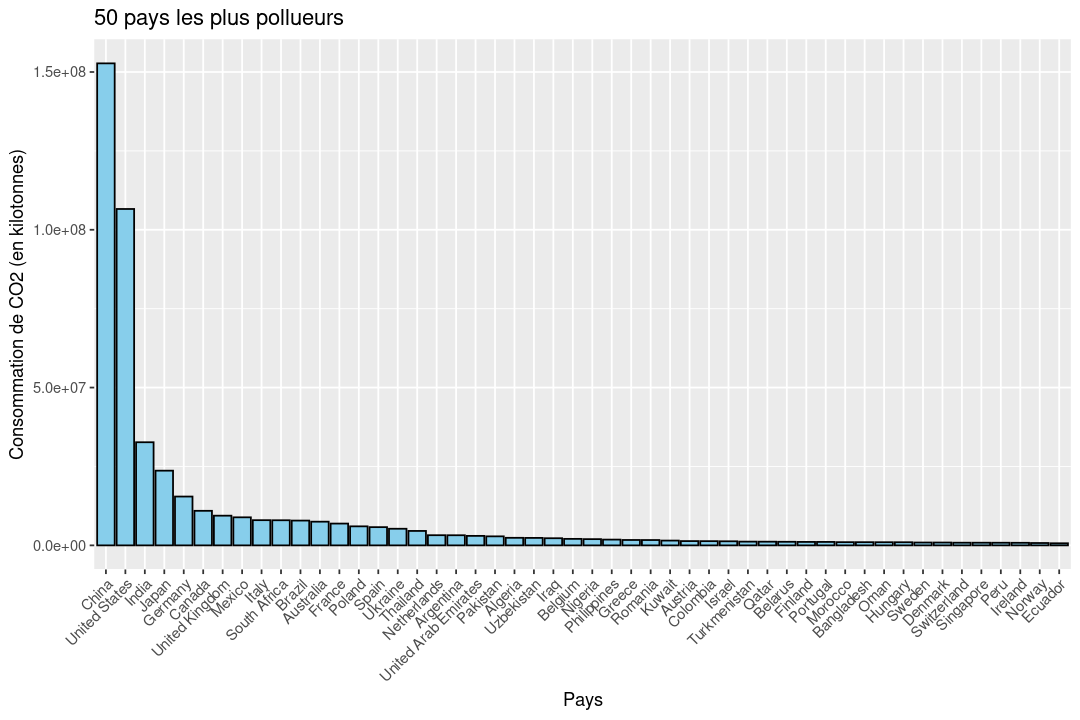

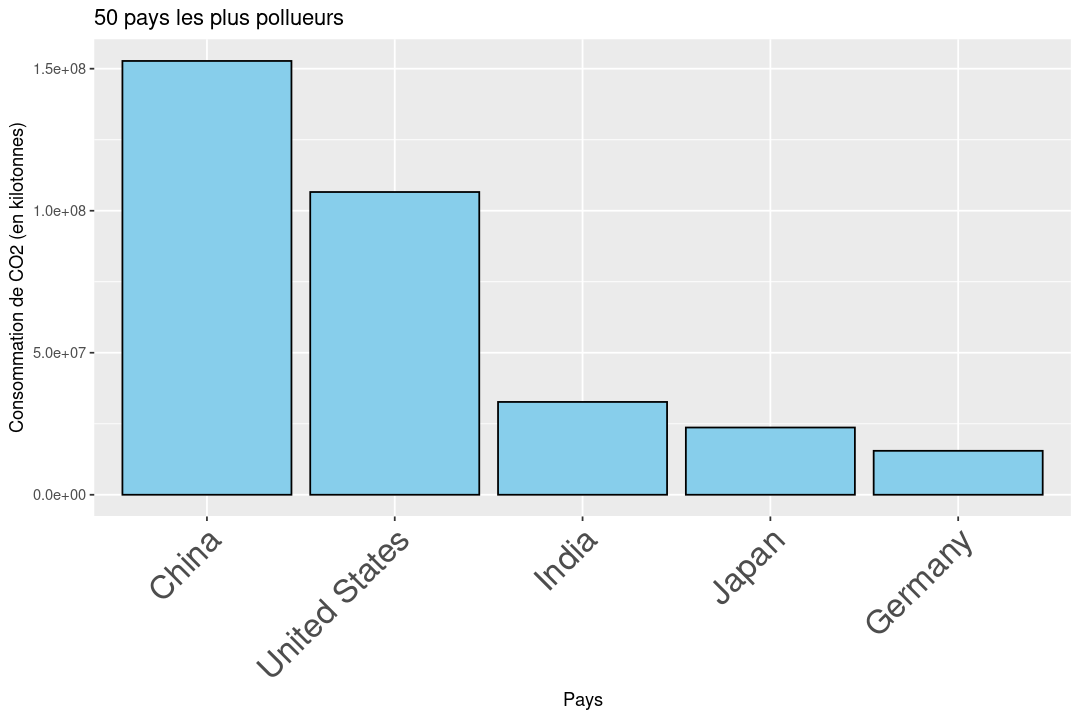

In [29]:
emissions_par_pays <- df %>% select(Entity,Value_co2_emissions_kt_by_country)

emissions_par_pays <- emissions_par_pays %>% ## on regroupe les pays en sommant leur consommation de co2
  group_by(Entity) %>%
  summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

emissions_par_pays<- emissions_par_pays %>% arrange(desc(Value_co2_emissions_kt_by_country)) ## on classe par ordre décroissant

#emissions_par_pays <- distinct(emissions_par_pays,Entity)
# On sélectionne les 50 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:50)

ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))


## On sélectionne les 5 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:5)
ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 20))

6. Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations... Analysez les dépendances entre
les variables quantitatives

In [30]:
library(corrplot)

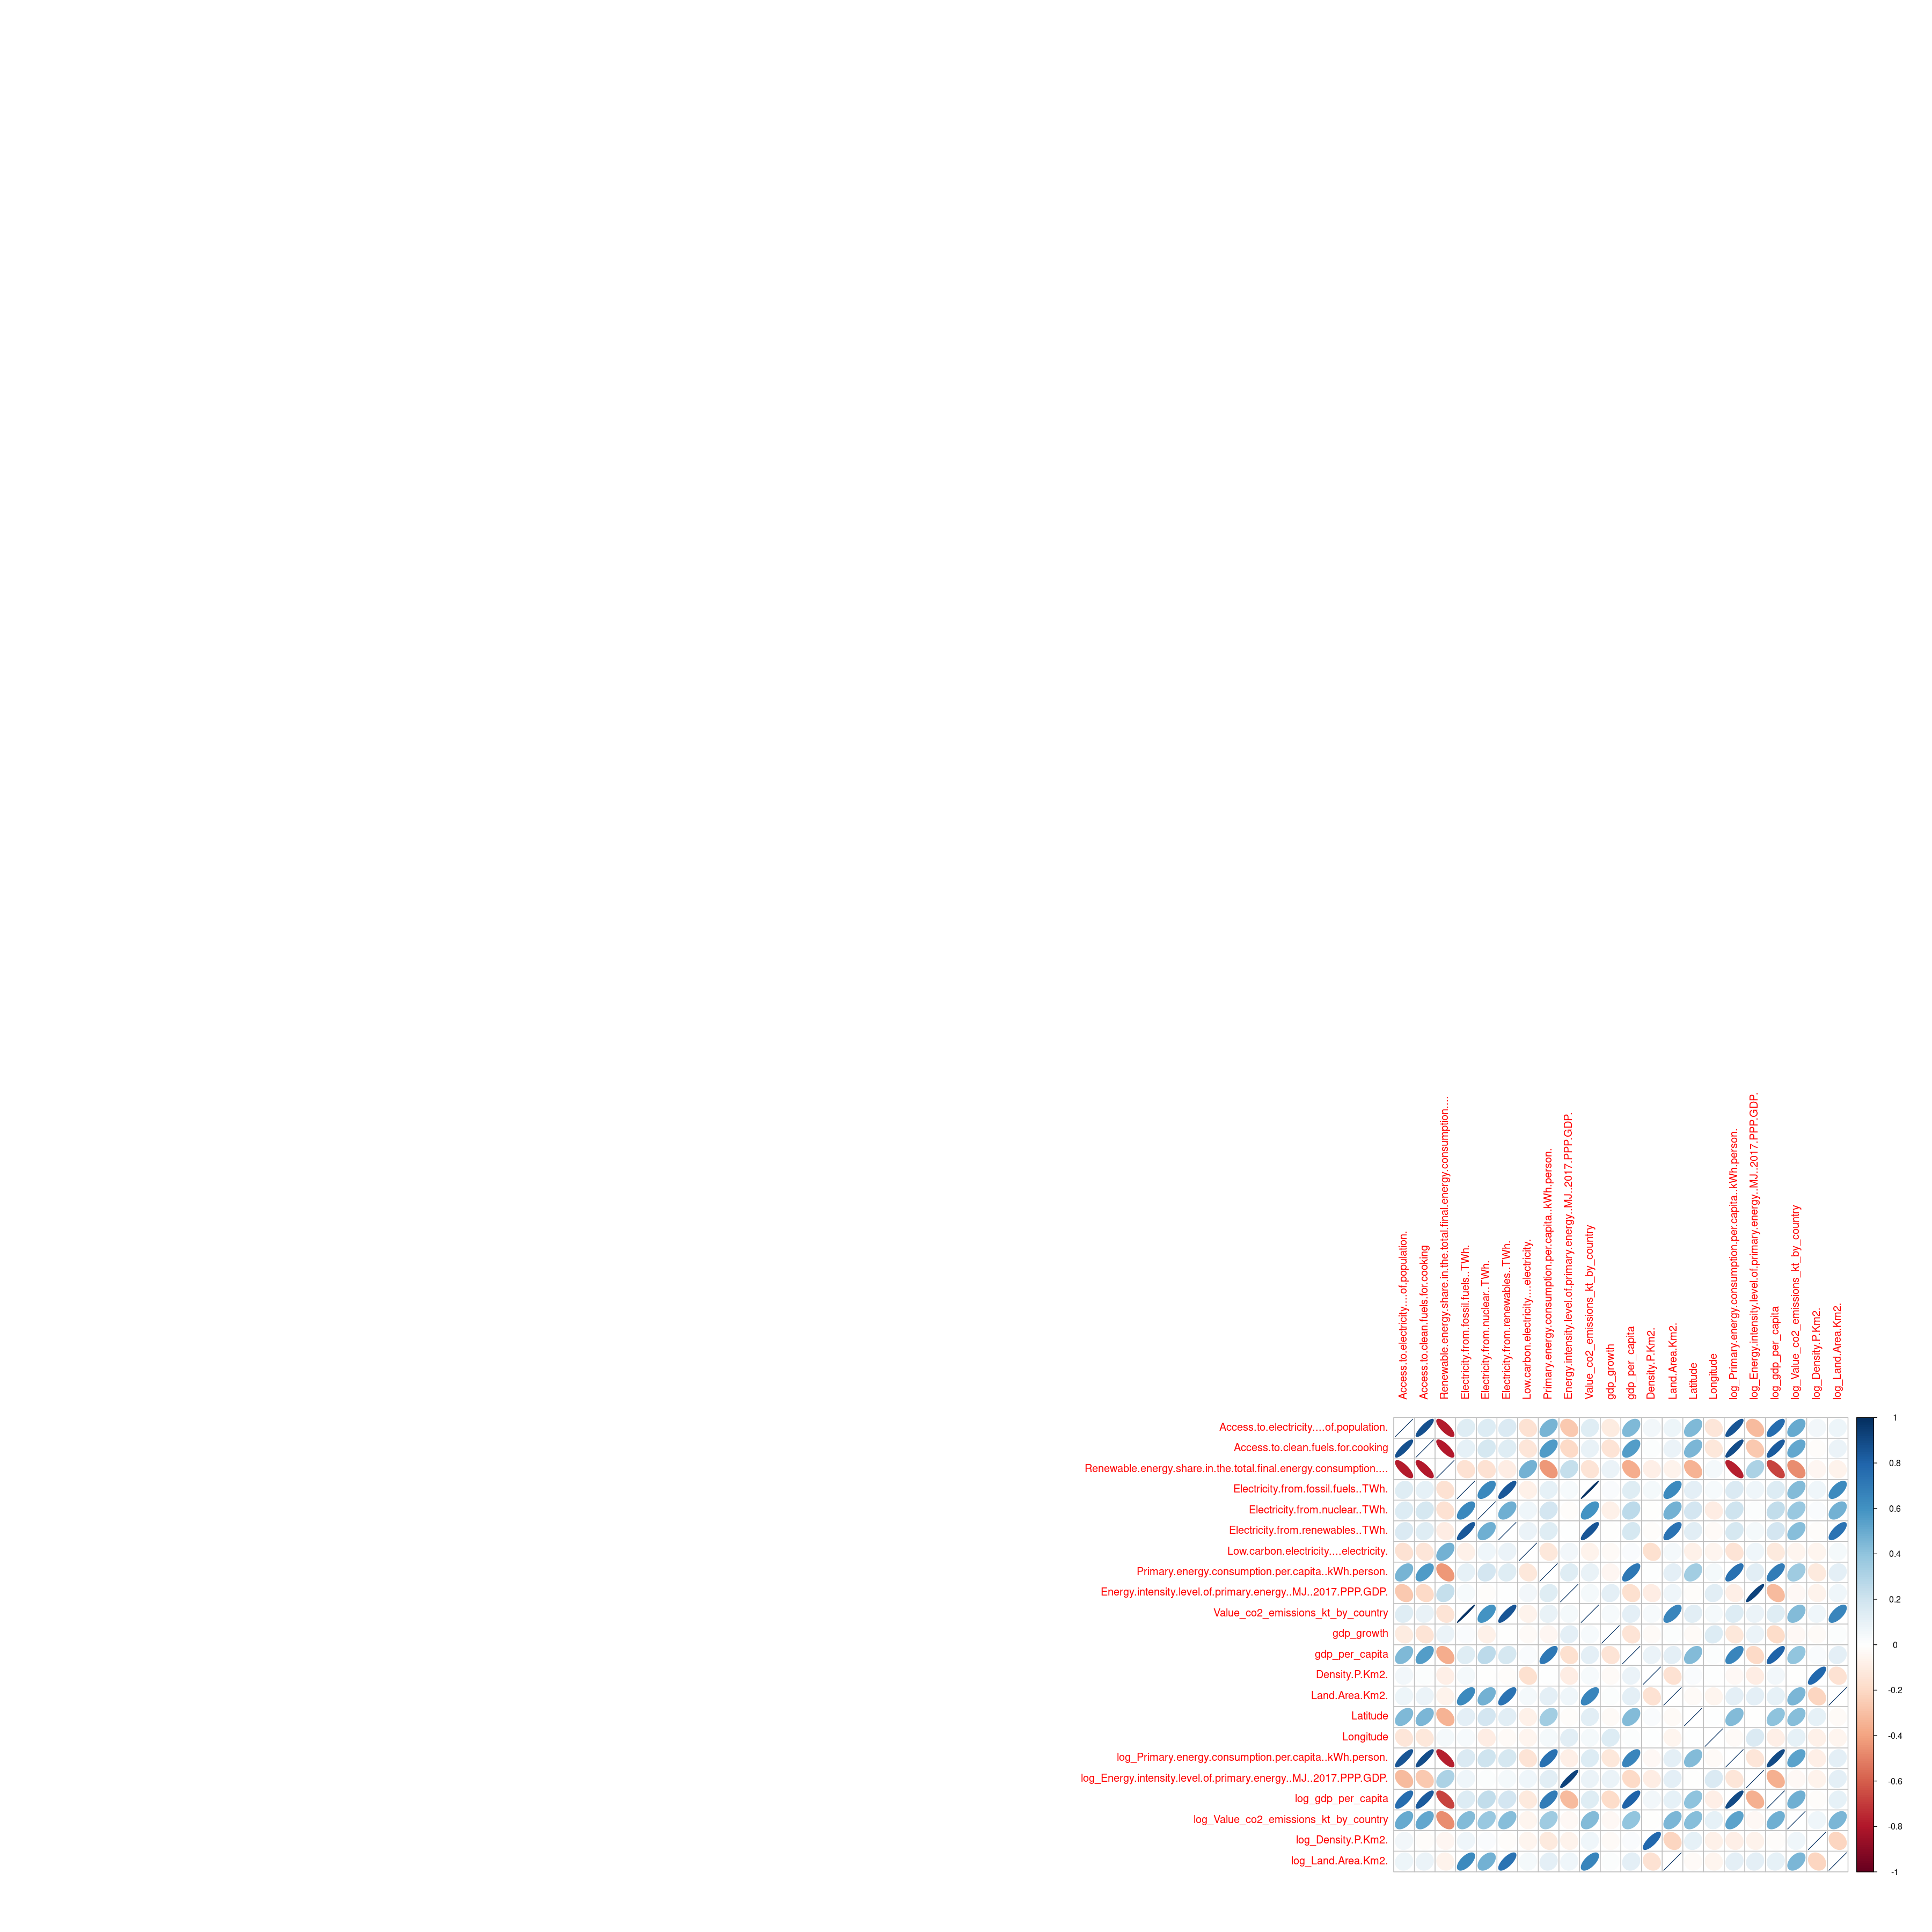

In [57]:
options(repr.plot.width=30, repr.plot.height=30)


cor_matrix <- cor(select(df, -c(1,2))) 

corrplot(cor_matrix,
        method = "ellipse",
        tl.cex = 1)

7. Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats

In [32]:
df_norm <- data.frame(scale(select(df, -c(Entity, Year)))) #Standardisation des données

In [33]:
library(FactoMineR)

In [34]:
df_pca <- PCA(df_norm)
print(df_pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 2868 individuals, described by 22 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error

In [35]:
summary(df_pca)  


Call:
PCA(X = df_norm) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               6.587   4.214   2.118   1.828   1.295   1.083   0.907
% of var.             29.942  19.155   9.625   8.308   5.887   4.922   4.125
Cumulative % of var.  29.942  49.097  58.722  67.030  72.917  77.839  81.964
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.830   0.761   0.620   0.521   0.330   0.202   0.160
% of var.              3.773   3.460   2.818   2.369   1.499   0.918   0.728
Cumulative % of var.  85.737  89.197  92.015  94.384  95.883  96.801  97.528
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.145   0.124   0.100   0.077   0.059   0.033   0.007
% of var.              0.657   0.562   0.454   0.352   0.266   0.150   0.031
Cumulative % of var.  98.185  98.747  99.201  99.553  99.819  99.969 100.000
                      Dim.22
Variance

In [36]:
df_pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,6.587167e+00,2.994167e+01,29.94167
comp 2,4.214209e+00,1.915550e+01,49.09716
comp 3,2.117548e+00,9.625219e+00,58.72238
comp 4,1.827695e+00,8.307704e+00,67.03009
comp 5,1.295188e+00,5.887220e+00,72.91731
comp 6,1.082749e+00,4.921587e+00,77.83889
comp 7,9.075000e-01,4.125000e+00,81.96389
comp 8,8.301620e-01,3.773464e+00,85.73736
comp 9,7.611251e-01,3.459660e+00,89.19702
comp 10,6.199043e-01,2.817747e+00,92.01476


In [37]:
library(factoextra)

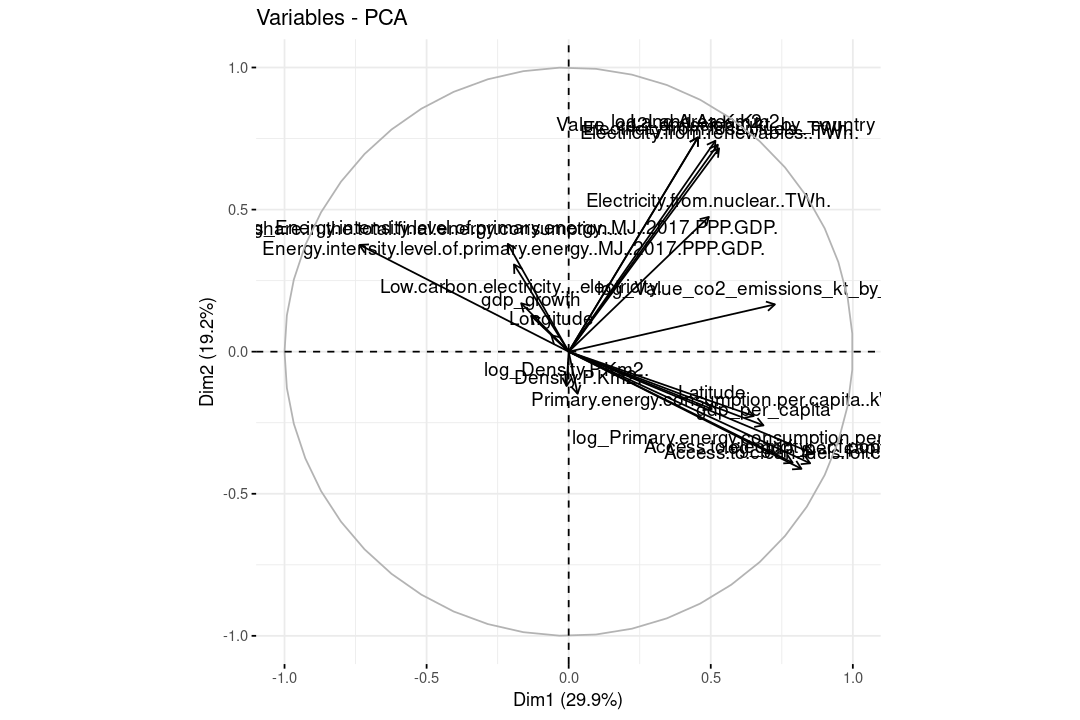

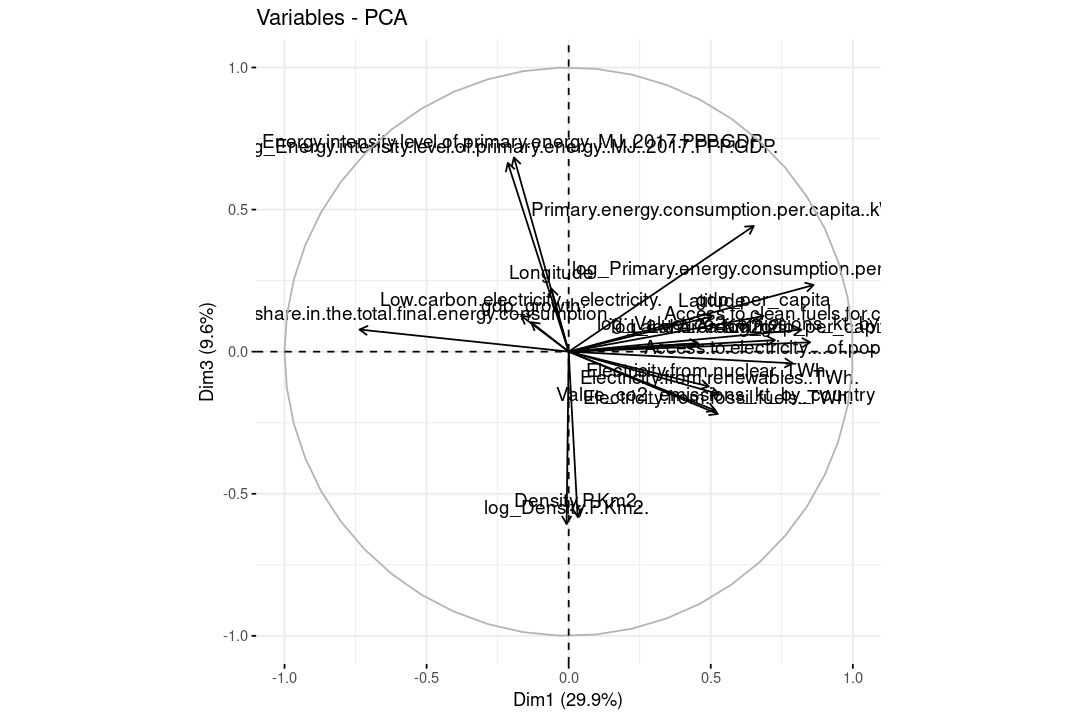

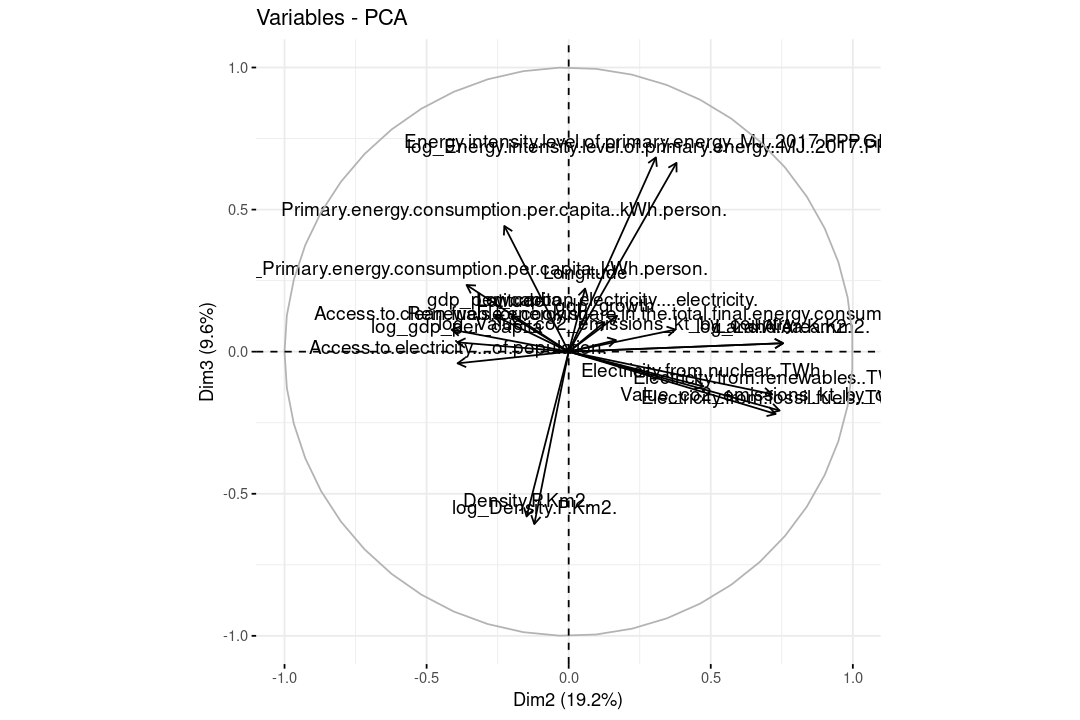

In [38]:
options(repr.plot.width = 9, repr.plot.height = 6)

fviz_pca_var(df_pca)
fviz_pca_var(df_pca, axes=c(1,3))
fviz_pca_var(df_pca, axes=c(2,3))
# à voir

#fviz_pca(df_PCA, axes=c(1,2), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(1,3), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(2,3), geom = c("point"), col.ind="grey")

In [39]:
library(viridis)

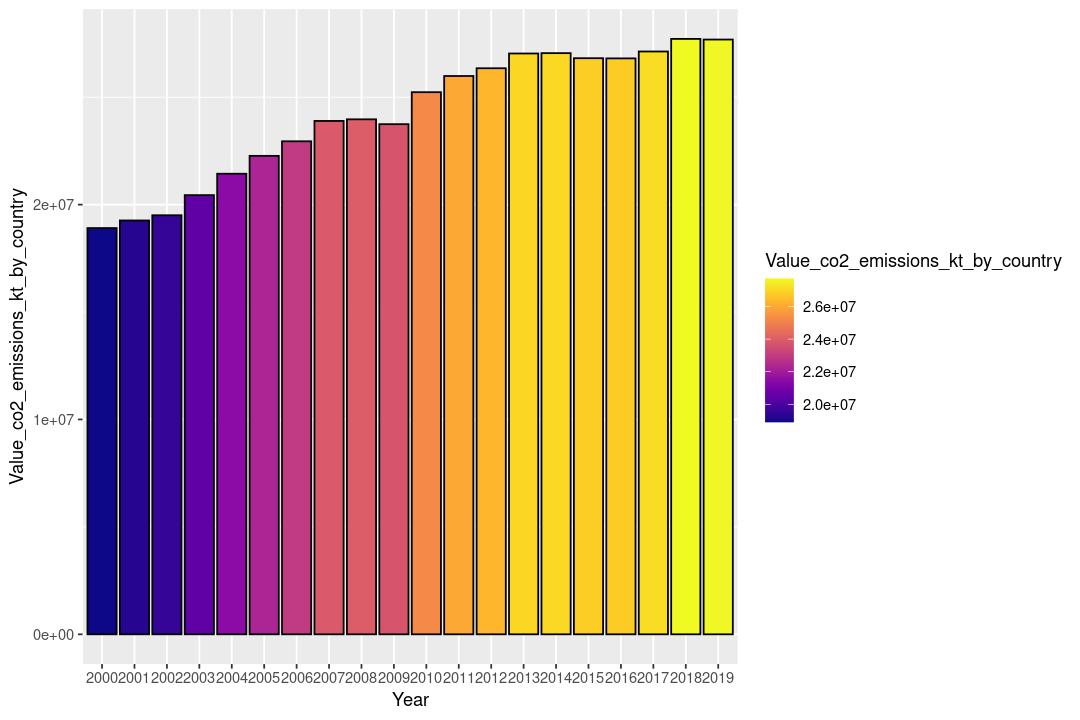

In [40]:
df_somme_annee <- select(df, c(Year, Value_co2_emissions_kt_by_country))
df_somme_annee <- df_somme_annee %>%
    group_by(Year) %>% 
    summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

ggplot(df_somme_annee, aes(x = Year, y = Value_co2_emissions_kt_by_country, fill = Value_co2_emissions_kt_by_country))+
    geom_bar(stat = "identity", color = "black")+
    scale_fill_viridis(option="plasma")

1. Divisez le jeu de données sans données manquantes en un échantillon d’apprentissage et un échantillon
test. Vous prendrez un pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire
lorsque nous nous concentrons sur les performances des algorithmes ?

In [44]:
df_norm <- data.frame(df_norm)

set.seed(579) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test

npop <- nrow(df_norm) # nombre de lignes dans les données
nvar <- ncol(df_norm) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio)

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

# construction de l'échantillon d'apprentissage
datappr <- df_norm[appri, -c(1,2,5)]
# construction de l'échantillon test
datastr <- df_norm[testi, -c(1,2,5)]

datappr_tot <- df[appri, -c(1,5)]

# vérification
str(datappr)
str(datastr)

'data.frame':	2294 obs. of  19 variables:
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  0.0286 0.281 -0.064 -0.1303 -0.4873 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  -0.204 -0.204 -0.204 -0.204 -0.204 ...
 $ Electricity.from.renewables..TWh.                               : num  -0.241 -0.242 -0.242 -0.241 -0.242 ...
 $ Low.carbon.electricity....electricity.                          : num  0.795 0.676 0.691 1.061 0.997 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  -0.697 -0.698 -0.696 -0.695 -0.687 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  -1.123 -1.179 -1.12 -1.095 -0.972 ...
 $ Value_co2_emissions_kt_by_country                               : num  -0.205 -0.205 -0.204 -0.204 -0.202 ...
 $ gdp_growth                                                      : num  1.06271 -0.5341 1.57878 0.31472 0.00638 ...
 $ gdp_per_capita                                     

2.1 Modèle de régression linéaire Gaussien sans sélection de variables

In [49]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

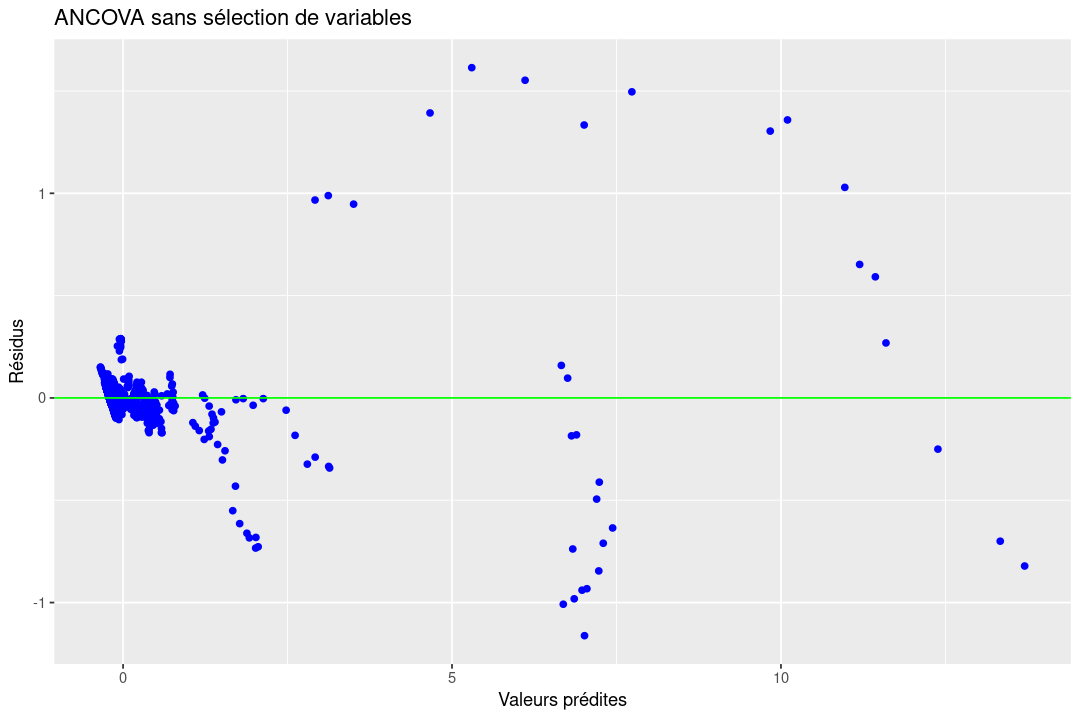

In [50]:
# estimation du modèle sans interaction
reg.lm <- aov(Value_co2_emissions_kt_by_country ~ . , data = datappr)

# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

# Graphe des résidus. 
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

In [52]:
summary(reg.lm)

                                                                   Df Sum Sq
Renewable.energy.share.in.the.total.final.energy.consumption....    1   50.0
Electricity.from.fossil.fuels..TWh.                                 1 2351.8
Electricity.from.renewables..TWh.                                   1    5.1
Low.carbon.electricity....electricity.                              1    0.0
Primary.energy.consumption.per.capita..kWh.person.                  1    0.3
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.         1    0.8
gdp_growth                                                          1    0.3
gdp_per_capita                                                      1    0.4
Density.P.Km2.                                                      1    0.0
Land.Area.Km2.                                                      1    0.7
Latitude                                                            1    0.3
Longitude                                                           1    0.1

In [53]:
coef(reg.lm)

(Intercept) 
                                                    0.0002315589 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                   -0.0047670653 
                             Electricity.from.fossil.fuels..TWh. 
                                                    0.9136776419 
                               Electricity.from.renewables..TWh. 
                                                    0.0655517883 
                          Low.carbon.electricity....electricity. 
                                                    0.0071738737 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                   -0.0031906828 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                    0.0143607486 
                                                      gdp_growth 
                                                    0.0083769867 
                                                  gdp_per_capita 
                                                   -0.0285954425 
                                                  Density.P.Km2. 
                                                   -0.0146050175 
                                                  Land.Area.Km2. 
                                                    0.0448244866 
                                                        Latitude 
                                                    0.0167441343 
                                                       Longitude 
                                                    0.0115519701 
          log_Primary.energy.consumption.per.capita..kWh.person. 
                                                    0.0184444381 
 log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                   -0.0082302085 
                                              log_gdp_per_capita 
                                                   -0.0036226883 
                           log_Value_co2_emissions_kt_by_country 
                                                   -0.0193049804 
                                              log_Density.P.Km2. 
                                                    0.0261912579

Modèle de régression quadratique 

In [ ]:
reg.glm <- glm(Value_co2_emissions_kt_by_country~ ., data = datappr)
summary(reg.glm)

In [54]:
# Estimation du modèle avec toutes les interactions d'ordre 2
reg.glm <- glm(Value_co2_emissions_kt_by_country~ .^2, data = datappr)
summary(reg.glm)


Call:
glm(formula = Value_co2_emissions_kt_by_country ~ .^2, data = datappr)

Coefficients: (17 not defined because of singularities)
                                                                                                                                   Estimate
(Intercept)                                                                                                                      -2.157e-01
Renewable.energy.share.in.the.total.final.energy.consumption....                                                                 -4.025e-02
Electricity.from.fossil.fuels..TWh.                                                                                               2.299e-03
Electricity.from.renewables..TWh.                                                                                                -2.113e-01
Low.carbon.electricity....electricity.                                                                                            4.171e-02
Primary.energy.consumptio

In [55]:
reg.glm.step <- step(reg.glm, direction = "backward", trace=0)
summary(reg.glm.step)

In [ ]:
reg.glm.step.BIC <- step(reg.glm, direction = "backward", k=log(nrow(datappr)),trace=0)
summary(reg.glm.step.BIC)

In [ ]:
library(glmnet)